# Setting

In [1]:
import bt
import FinanceDataReader as fdr
import pandas as pd

from pf_utils import convert_rate_to_price
from pf_utils import Backtest, get_date_range, metrics

In [2]:
path_data = 'data'

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## testing

### class

### test

In [183]:
bts.portfolios

{'KOSPI': <bt.backtest.Backtest at 0x76131c8a5160>,
 'TDF COMB': <bt.backtest.Backtest at 0x761317e05e20>,
 'TDF COMB w/fee': <bt.backtest.Backtest at 0x761317e04530>,
 'TDF COMB DCA': <bt.backtest.Backtest at 0x761317e07500>,
 'TDF COMB DCA w/fee': <bt.backtest.Backtest at 0x761317e07ef0>,
 'TDF COMB DCA2': <bt.backtest.Backtest at 0x761317e07b90>,
 'ETF COMB1': <bt.backtest.Backtest at 0x761317e074d0>,
 'ETF COMB2': <bt.backtest.Backtest at 0x761317e06330>}

In [122]:
import bt
t0 = bts.portfolios['KOSPI']
t1 = bts.portfolios['TDF COMB']
t2 = bts.portfolios['ETF COMB1']
t3 = bts.portfolios['ETF COMB2']
t4 = bts.portfolios['TDF COMB DCA']
res = bt.run(t0,t1,t2,t3,t4)

In [19]:
df.index.strftime('%Y%m%d')[0]

'20180713'

# Data

## TDF
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [4]:
file = '금융자산운용 - export.csv'
df_info = pd.read_csv(f'{path_data}/{file}')

In [5]:
tdf_names = df_info.set_index('ticker')['name'].to_dict()
commissions = df_info.set_index('ticker')['commission'].to_dict()
{tdf_names[k]:v for k,v in commissions.items()}

{'미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e': 0.6,
 '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)': 0.48,
 '미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e': 0.54,
 '미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e': 0.74,
 '키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)': 0.68,
 'KODEX 미국S&P500TR assumed from S&P500 rate of return': 0.0}

In [6]:
df_info = df_info.iloc[:-1]
df_tdfs = None

for _, data in df_info.iterrows():
    df = convert_rate_to_price(data, path=path_data)
    
    if df_tdfs is None:
        df_tdfs = df.to_frame()
    else:
        df_tdfs = df_tdfs.join(df, how='outer')

error: -0.07 %
error: -0.00 %
error: 0.16 %
error: -0.13 %
error: 0.00 %


In [7]:
get_date_range(df_tdfs)

,start date,end date
K55301BU5479,2017-08-14,2024-06-16
K55301BU6139,2017-09-20,2024-06-16
K55301BU5453,2017-09-29,2024-06-16
K55206C96311,2018-07-13,2024-06-17
K55206C95800,2018-07-26,2024-06-13


<Axes: xlabel='date'>

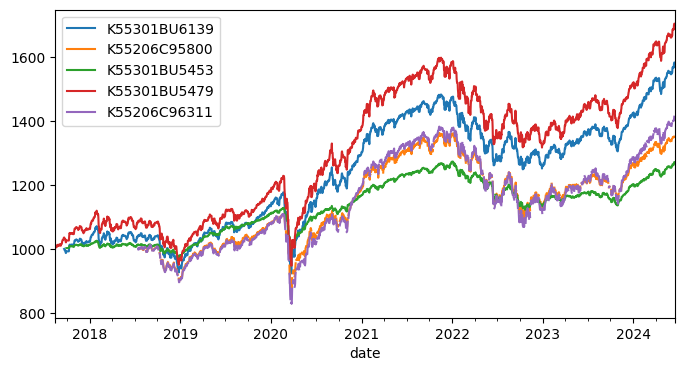

In [8]:
df_tdfs.plot(figsize=(8,4))

## ETF

In [9]:
file = 'etfs_selected_240611.csv'
df_etfs = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=0)
df_etfs.head()

,273130,453850,284430,069500,379800,411060,305080,304660,148070,261220
Date,,,,,,,,,,
2002-10-14,NaN,NaN,NaN,5184,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-15,NaN,NaN,NaN,5312,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-16,NaN,NaN,NaN,5335,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-17,NaN,NaN,NaN,5410,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-18,NaN,NaN,NaN,5642,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_sym = fdr.StockListing('ETF/KR') # 한국 ETF 전종목

symbols = df_etfs.columns
etf_names = df_sym.loc[df_sym.Symbol.isin(symbols)].set_index('Symbol')['Name'].to_dict()
etf_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)'}

In [11]:
get_date_range(df_etfs)

,start date,end date
069500,2002-10-14,2024-06-11
148070,2011-10-20,2024-06-11
261220,2016-12-27,2024-06-11
273130,2017-06-29,2024-06-11
284430,2017-11-30,2024-06-11
305080,2018-08-30,2024-06-11
304660,2018-09-12,2024-06-11
379800,2021-04-09,2024-06-11
411060,2021-12-15,2024-06-11
453850,2023-03-14,2024-06-11


In [12]:
equity_names = etf_names.copy()
equity_names.update(tdf_names)

# Backtest

## Setting

In [13]:
{x: equity_names[x] for x in df_tdfs.columns}

{'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e',
 'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
 'K55301BU5453': '미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e',
 'K55301BU5479': '미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e',
 'K55206C96311': '키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)'}

In [14]:
cols = ['K55301BU6139', 'K55206C95800']
df1 = df_tdfs[cols]
[equity_names[x] for x in df1.columns]

['미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e',
 '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)']

In [15]:
{x:equity_names[x] for x in df_etfs.columns}

{'273130': 'KODEX 종합채권(AA-이상)액티브',
 '453850': 'ACE 미국30년국채액티브(H)',
 '284430': 'KODEX 200미국채혼합',
 '069500': 'KODEX 200',
 '379800': 'KODEX 미국S&P500TR',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '148070': 'KOSEF 국고채10년',
 '261220': 'KODEX WTI원유선물(H)'}

In [16]:
#cols = ['069500', '148070', '305080', '379800']
cols = ['069500', '273130', '148070', '379800']
df2 = df_etfs[cols]
{x:equity_names[x] for x in df2.columns}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [17]:
df = df1.join(df2, how='outer')

bts = Backtest(df, metrics=metrics, initial_capital=10000000,
               equity_names=equity_names, commissions=None)

backtest period reset: 2021-04-09 ~ 2024-06-11
rate of nan filled forward::
  K55301BU6139: 0.001
  K55206C95800: 0.478
  069500: 0.485
  273130: 0.485
  148070: 0.485
  379800: 0.485


Baseline

In [18]:
name = 'KOSPI'
ticker = '069500'
bts.buy_n_hold(ticker, name=name)

## TDF

In [19]:
tickers = ['K55301BU6139', 'K55206C95800']
weights = [0.5, 0.5]
weights = dict(zip(tickers, weights))

In [20]:
name = 'TDF COMB'
bts.build(weights, name, period='Y')

In [21]:
name = 'TDF COMB w/fee'
bts.build(weights, name, period='Y', commissions=commissions)

In [22]:
name = 'TDF COMB DCA'
bts.build(weights, name, period='M', 
          initial_capital=0, capital_flow=1000000)

In [23]:
name = 'TDF COMB DCA w/fee'
bts.build(weights, name, period='M', 
          initial_capital=0, capital_flow=1000000, commissions=commissions)

In [24]:
name = 'TDF COMB DCA2'
bts.build(weights, name, period='Q', 
          #initial_capital=0, 
          capital_flow=5000000, commissions=commissions)

## ETF

In [25]:
etfs = ['069500', '273130', '148070', '379800']
[equity_names[x] for x in etfs]

['KODEX 200', 'KODEX 종합채권(AA-이상)액티브', 'KOSEF 국고채10년', 'KODEX 미국S&P500TR']

In [26]:
name = 'ETF COMB1'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etfs, weights))
bts.build(weights, name, period='Y')

In [27]:
name = 'ETF COMB2'
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(etfs, weights))
bts.build(weights, name, period='Y')

## Compare

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee,TDF COMB DCA2,ETF COMB1,ETF COMB2
start,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.07205,0.095495,0.089502,0.080366,0.077757,0.075071,0.160406,0.091834
cagr,-0.02327,0.029135,0.027359,0.024638,0.023858,0.023054,0.047958,0.02805
max_drawdown,-0.342102,-0.174055,-0.174059,-0.166899,-0.167251,-0.158577,-0.141659,-0.16493
avg_drawdown,-0.085707,-0.016229,-0.016504,-0.016196,-0.014564,-0.011319,-0.01141,-0.013601
avg_drawdown_days,229.0,56.210526,56.578947,63.235294,56.842105,48.363636,34.129032,43.48
daily_vol,0.136883,0.052665,0.052722,0.050338,0.050339,0.046337,0.06132,0.063515
daily_sharpe,-0.050308,0.402564,0.379586,0.358775,0.348333,0.362538,0.557741,0.332261
daily_sortino,-0.079776,0.611235,0.576085,0.545526,0.529736,0.556782,0.867468,0.51778


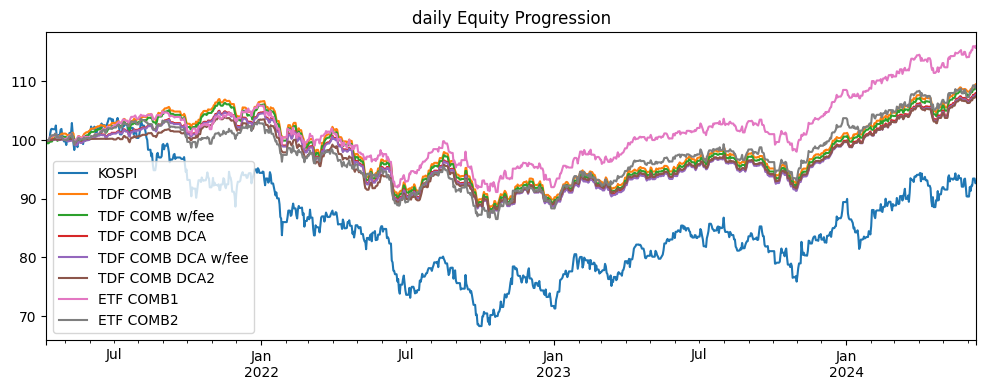

In [28]:
bts.run(figsize=(12,4))

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee,TDF COMB DCA2
start,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.07205,0.095495,0.089502,0.080366,0.077757,0.075071
cagr,-0.02327,0.029135,0.027359,0.024638,0.023858,0.023054
max_drawdown,-0.342102,-0.174055,-0.174059,-0.166899,-0.167251,-0.158577
avg_drawdown,-0.085707,-0.016229,-0.016504,-0.016196,-0.014564,-0.011319
avg_drawdown_days,229.0,56.210526,56.578947,63.235294,56.842105,48.363636
daily_vol,0.136883,0.052665,0.052722,0.050338,0.050339,0.046337
daily_sharpe,-0.050308,0.402564,0.379586,0.358775,0.348333,0.362538
daily_sortino,-0.079776,0.611235,0.576085,0.545526,0.529736,0.556782


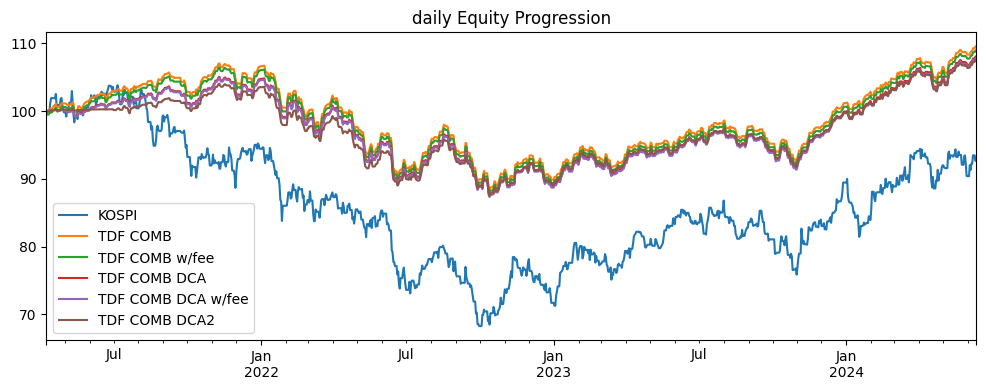

In [29]:
bts.run(range(6), figsize=(12,4))

In [30]:
{i:x for i,x in enumerate(bts.portfolios.keys())}

{0: 'KOSPI',
 1: 'TDF COMB',
 2: 'TDF COMB w/fee',
 3: 'TDF COMB DCA',
 4: 'TDF COMB DCA w/fee',
 5: 'TDF COMB DCA2',
 6: 'ETF COMB1',
 7: 'ETF COMB2'}

,KOSPI,TDF COMB,TDF COMB DCA,TDF COMB DCA2,ETF COMB1,ETF COMB2
start,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00,2021-04-08 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.07205,0.095495,0.080366,0.075071,0.160406,0.091834
cagr,-0.02327,0.029135,0.024638,0.023054,0.047958,0.02805
max_drawdown,-0.342102,-0.174055,-0.166899,-0.158577,-0.141659,-0.16493
avg_drawdown,-0.085707,-0.016229,-0.016196,-0.011319,-0.01141,-0.013601
avg_drawdown_days,229.0,56.210526,63.235294,48.363636,34.129032,43.48
daily_vol,0.136883,0.052665,0.050338,0.046337,0.06132,0.063515
daily_sharpe,-0.050308,0.402564,0.358775,0.362538,0.557741,0.332261
daily_sortino,-0.079776,0.611235,0.545526,0.556782,0.867468,0.51778


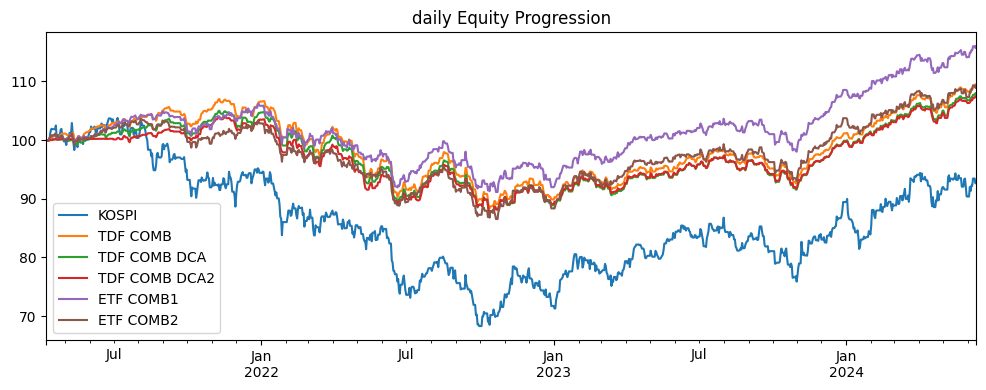

In [31]:
bts.run([0,1,3,5,6,7], figsize=(12,4))

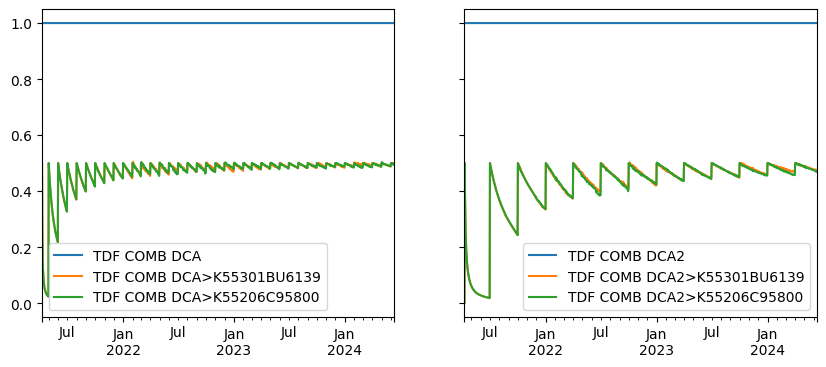

In [41]:
bts.plot_weights([2,3], figsize=(10,4))

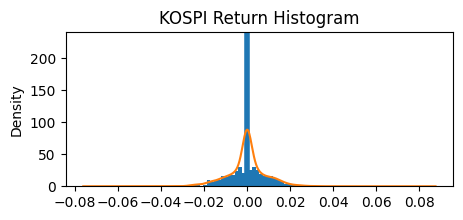

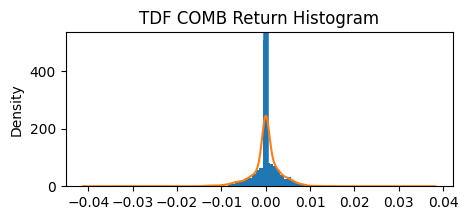

In [49]:
bts.plot_histogram([0,1], bins=50, figsize=(5,2))

# Scaled

## Data

In [45]:
etfs = ['069500', '273130', '148070', '379800']
{x: etf_names[x] for x in etfs}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [46]:
get_date_range(df_etfs[etfs])

,start date,end date
069500,2002-10-14,2024-06-11
148070,2011-10-20,2024-06-11
273130,2017-06-29,2024-06-11
379800,2021-04-09,2024-06-11


In [47]:
start_date = '2017-06-29'

In [48]:
df_snp = fdr.DataReader('S&P500')
df_snp = df_snp['Adj Close']
df_rate = df_snp/df_snp[0]-1
df_rate

Date
1980-01-02     0.000000
1980-01-03    -0.005106
1980-01-04     0.007186
1980-01-07     0.009928
1980-01-08     0.030163
                ...    
2024-06-11    49.825640
2024-06-12    50.257845
2024-06-13    50.378027
2024-06-14    50.357791
2024-06-17    50.290846
Name: Adj Close, Length: 11209, dtype: float64

In [49]:
df_379800 = df_etfs['379800'].dropna()
df_379800.head()
#df_379800.tail()

Date
2021-04-09    10085.0
2021-04-12    10155.0
2021-04-13    10190.0
2021-04-14    10145.0
2021-04-15    10130.0
Name: 379800, dtype: float64

In [50]:
file = '금융자산운용 - export.csv'
df_info = pd.read_csv(f'{path_data}/{file}')
df_info.iloc[-1]

name            KODEX 미국S&P500TR assumed from S&P500 rate of r...
ticker                                                   379800_R
commission                                                    0.0
data_type                                                      -1
file                                                     379800_R
check1_date                                            2024-06-11
check1_price                                              16770.0
check2_date                                            2021-04-09
check2_price                                              10085.0
Name: 5, dtype: object

In [51]:
data = df_info.iloc[-1]
df_379800r = convert_rate_to_price(data, rate_is_percent=False, df_rate=df_rate)
df_379800r

error: 27.73 %


date
1980-01-02      329.951573
1980-01-03      328.266871
1980-01-04      332.322617
1980-01-07      333.227366
1980-01-08      339.903766
                  ...     
2024-06-11    16770.000000
2024-06-12    16912.606593
2024-06-13    16952.260834
2024-06-14    16945.584007
2024-06-17    16923.495478
Name: 379800_R, Length: 11209, dtype: float64

<Axes: xlabel='Date'>

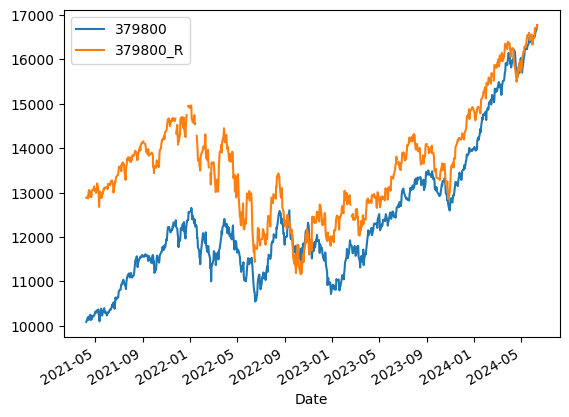

In [52]:
df_379800.to_frame().join(df_379800r).plot()

In [53]:
etfs = ['069500', '273130', '148070']
df = df_etfs[etfs].join(df_379800r).loc[start_date:]
df

,069500,273130,148070,379800_R
Date,,,,
2017-06-29,27193,99855.0,106044.0,7549.014665
2017-06-30,27109,99810.0,105817.0,7560.589054
2017-07-03,27170,99745.0,105613.0,7578.060320
2017-07-04,27002,99655.0,105190.0,NaN
2017-07-05,27105,99620.0,105253.0,7589.073356
...,...,...,...,...
2024-06-04,36390,110605.0,111850.0,16507.998052
2024-06-05,36755,110820.0,112200.0,16703.579031
2024-06-07,37240,111075.0,112610.0,16681.616938


In [54]:
ticker = '379800_R'
etf_names.update({ticker:'KODEX 미국S&P500TR assumed from S&P500 rate of return'})
etfs.append(ticker)

## Backtest

In [55]:
bts = Backtest(df, metrics=metrics, initial_capital=10000000,
               equity_names=etf_names, commissions=None)

backtest period reset: 2017-06-29 ~ 2024-06-11
rate of nan filled forward::
  069500: 0.000
  273130: 0.000
  148070: 0.000
  379800_R: 0.033


In [56]:
name = 'KOSPI'
ticker = '069500'
bts.buy_n_hold(ticker, name=name)

In [57]:
{x:etf_names[x] for x in etfs}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800_R': 'KODEX 미국S&P500TR assumed from S&P500 rate of return'}

In [58]:
name = 'ETF COMB1'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etfs, weights))
bts.build(weights, name, period='Y')

In [59]:
name = 'ETF COMB1 (M)'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etfs, weights))
bts.build(weights, name, period='M', capital_flow=1000000)

In [60]:
name = 'ETF COMB2'
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(etfs, weights))
bts.build(weights, name, period='Y')

,KOSPI,ETF COMB1,ETF COMB1 (M),ETF COMB2
start,2017-06-28 00:00:00,2017-06-28 00:00:00,2017-06-28 00:00:00,2017-06-28 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,0.359183,0.450954,0.430813,0.383078
cagr,0.045118,0.054983,0.052865,0.04774
max_drawdown,-0.380162,-0.189178,-0.190569,-0.20192
avg_drawdown,-0.047992,-0.012449,-0.012622,-0.015412
avg_drawdown_days,94.576923,26.809524,27.47561,39.288136
daily_vol,0.184222,0.078006,0.078233,0.077309
daily_sharpe,0.337775,0.743129,0.714828,0.657651
daily_sortino,0.555855,1.165093,1.118762,1.04768


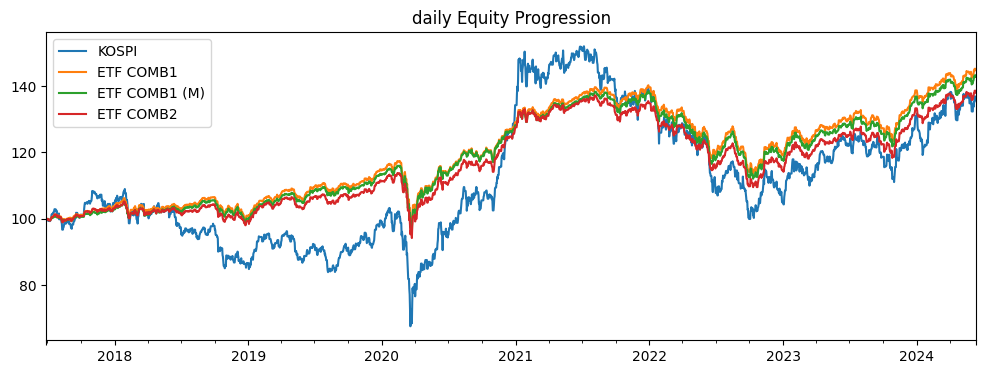

In [61]:
bts.run(figsize=(12,4))

In [82]:
bts.show_weights('ETF COMB1')

KODEX 200                                              0.2
KODEX 종합채권(AA-이상)액티브                                   0.2
KOSEF 국고채10년                                           0.3
KODEX 미국S&P500TR assumed from S&P500 rate of return    0.3
dtype: float64

In [83]:
bts.show_weights('ETF COMB2')

KODEX 200                                              0.3
KODEX 종합채권(AA-이상)액티브                                   0.2
KOSEF 국고채10년                                           0.3
KODEX 미국S&P500TR assumed from S&P500 rate of return    0.2
dtype: float64

# Stats
- check plot_histogram in bt api
- check bayesian_returns2 in backtestlib

,KOSPI,TDF COMB
start,2021-04-08 00:00:00,2021-04-08 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.07205,0.095495
cagr,-0.02327,0.029135
max_drawdown,-0.342102,-0.174055
avg_drawdown,-0.085707,-0.016229
avg_drawdown_days,229.0,56.210526
daily_vol,0.136883,0.052665
daily_sharpe,-0.050308,0.402564
daily_sortino,-0.079776,0.611235


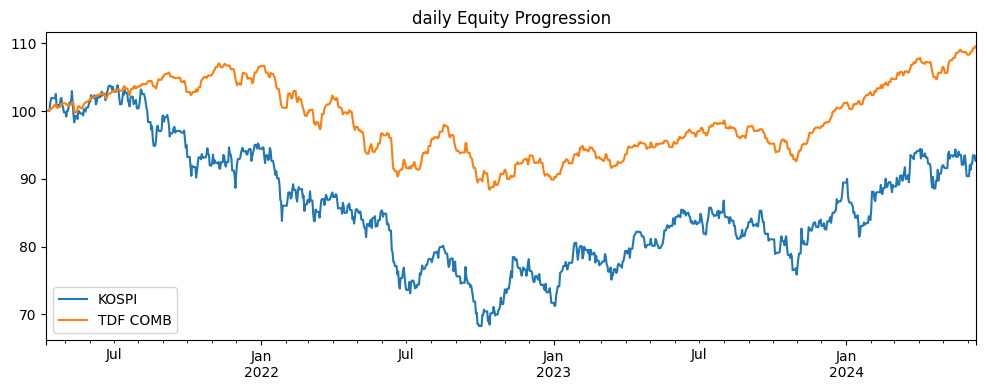

In [21]:
bts.run(figsize=(12,4))

In [71]:
a = bts.portfolios['TDF COMB']
a.data

,K55301BU6139,K55206C95800
2021-04-08,NaN,NaN
2021-04-09,1394.652287,1266.682110
2021-04-10,1394.652287,1266.682110
2021-04-11,1394.652287,1266.682110
2021-04-12,1396.754325,1269.287008
...,...,...
2024-06-07,1568.220582,1343.426434
2024-06-08,1568.220582,1343.426434
2024-06-09,1568.220582,1343.426434
2024-06-10,1567.620000,1350.640000


In [72]:
a.weights

,TDF COMB,TDF COMB>K55301BU6139,TDF COMB>K55206C95800
2021-04-08,1.0,0.000000,0.000000
2021-04-09,1.0,0.499983,0.499959
2021-04-10,1.0,0.499983,0.499959
2021-04-11,1.0,0.499983,0.499959
2021-04-12,1.0,0.499846,0.500097
...,...,...,...
2024-06-07,1.0,0.509505,0.490461
2024-06-08,1.0,0.509505,0.490461
2024-06-09,1.0,0.509505,0.490461
2024-06-10,1.0,0.508071,0.491895


In [73]:
a = a.data.join(a.weights).apply(lambda x: x[0]*x[3] + x[1]*x[4], axis=1).to_frame('TDF COMB').dropna()
a

,TDF COMB
2021-04-09,1330.591882
2021-04-10,1330.591882
2021-04-11,1330.591882
2021-04-12,1332.927874
2021-04-13,1334.244003
...,...
2024-06-07,1457.915651
2024-06-08,1457.915651
2024-06-09,1457.915651
2024-06-10,1460.836582


(-0.2, 0.2)

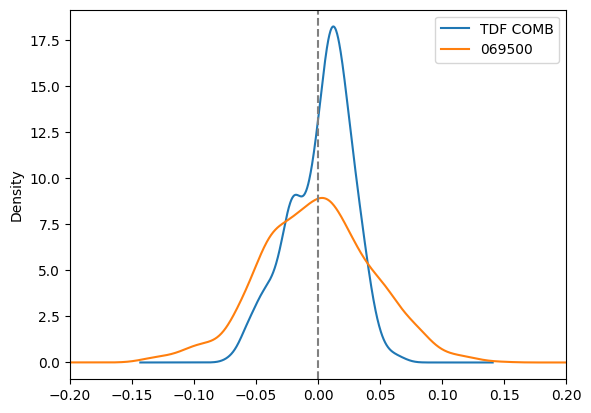

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = a.pct_change(30).plot(kind='kde', ax=ax)
_ = b.pct_change(30).plot(kind='kde', ax=ax)
ax.axvline(x=0, c='grey', ls='--')
ax.set_xlim([-0.2,0.2])

In [43]:
a.data

,K55301BU6139,K55206C95800
2021-04-08,NaN,NaN
2021-04-09,1394.652287,1266.682110
2021-04-10,1394.652287,1266.682110
2021-04-11,1394.652287,1266.682110
2021-04-12,1396.754325,1269.287008
...,...,...
2024-06-07,1568.220582,1343.426434
2024-06-08,1568.220582,1343.426434
2024-06-09,1568.220582,1343.426434
2024-06-10,1567.620000,1350.640000


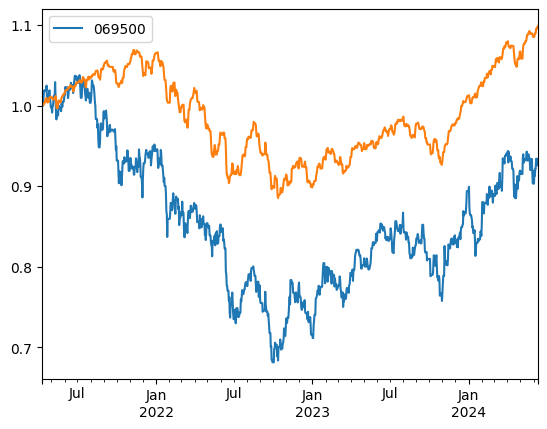

In [47]:
b = bts.portfolios['KOSPI'].data.dropna()
ax = b.mul(1/b.iloc[0]).plot()
_ = a.mul(1/a.iloc[0]).plot(ax=ax)

,KOSPI,TDF COMB
start,2021-04-08 00:00:00,2021-04-08 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.07205,0.095495
cagr,-0.02327,0.029135
max_drawdown,-0.342102,-0.174055
avg_drawdown,-0.085707,-0.016229
avg_drawdown_days,229.0,56.210526
daily_vol,0.136883,0.052665
daily_sharpe,-0.050308,0.402564
daily_sortino,-0.079776,0.611235


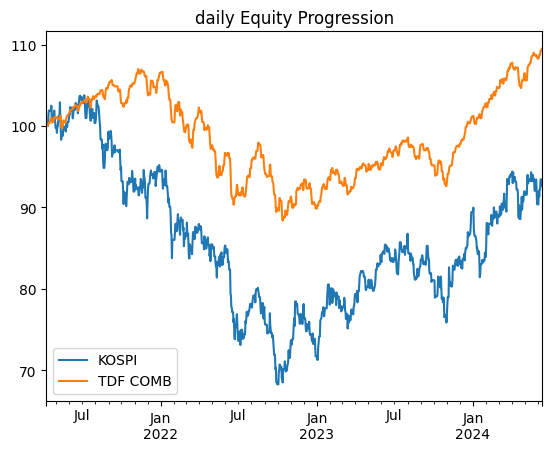

In [27]:
bts.run()

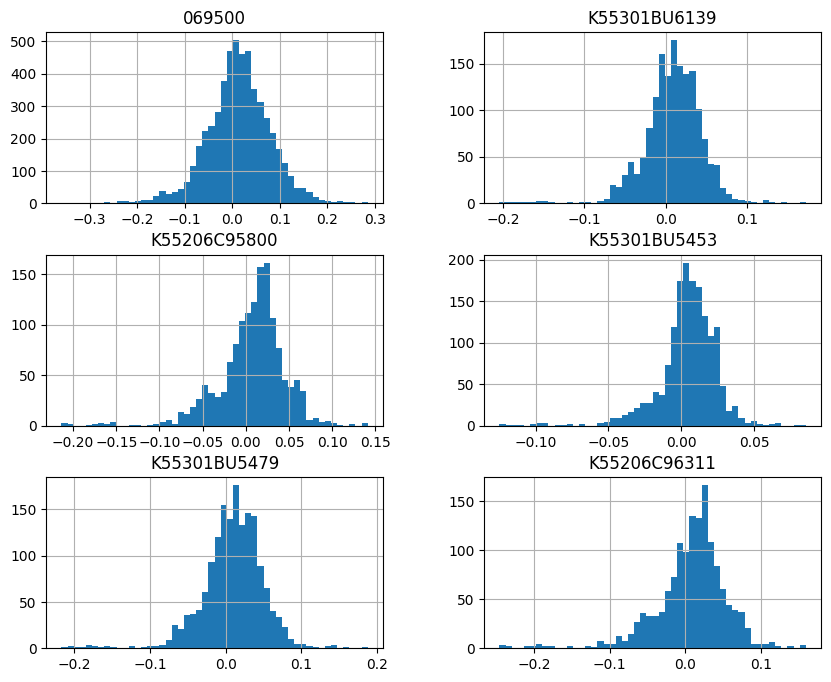

In [44]:
_ = df_etfs[['069500']].join(df_tdfs).ffill().pct_change(30).hist(bins=50, figsize=(10,8))

# testing: bayesian

In [66]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import pytensor.tensor as pt

#print(f"Running on PyMC v{pm.__version__}")

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(seed=42)

# see: https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html

def estimate_bayesian(df_price, multiplier_std=10, days_in_year=252,
                      sample_draws=1000, sample_tune=1000, target_accept=0.9):
    
    periods=1 
    df_ret = df_price.pct_change(periods).dropna()
    
    mean_prior = df_ret.mean()
    std_prior = df_ret.std()
    std_low = std_prior / multiplier_std
    std_high = std_prior * multiplier_std

    assets = list(df_ret.columns)
    num_assets = len(assets) # flag to plot comparisson if comparing two hists
    coords={'asset': assets}
    
        
    with pm.Model(coords=coords) as model:
        nu = pm.Exponential('nu_minus_two', 1 / 29, testval=4) + 2.
        
        #nu_minus_one = pm.Exponential("nu_minus_one", 1 / 29.0)
        #nu = pm.Deterministic("nu", nu_minus_one + 1)
        
        mean = pm.Normal(f'mean', mu=mean_prior, sigma=std_prior, dims='asset')
        std = pm.Uniform(f'std', lower=std_low, upper=std_high, dims='asset')
        returns = pm.StudentT(f'daily_return', nu=nu, mu=mean, sigma=std, observed=df_ret)
        
        std = std * pt.sqrt(nu / (nu - 2))
        T = days_in_year/periods # annualizing
        pm.Deterministic(f'daily_mean',  mean * T)
        pm.Deterministic(f'daily_vol',  std * (T ** .5))
        pm.Deterministic(f'daily_sharpe', (mean / std) * (T ** .5))

        #T = (days_in_year/periods/12) ** .5 # montly
        #pm.Deterministic(f'daily_mean',  mean * T)
        #pm.Deterministic(f'monthly_vol',  std * T)
        #pm.Deterministic(f'monthly_sharpe', (mean / std) * T)

        if num_assets == 2:
            mean_diff = pm.Deterministic('mean diff', mean[0] - mean[1])
            pm.Deterministic('std diff', std[0] - std[1])
            pm.Deterministic('effect size', mean_diff / (std[0] ** 2 + std[1] ** 2) ** .5 / 2)

        trace = pm.sample(draws=sample_draws, tune=sample_tune,
                          #chains=chains, cores=cores,
                          target_accept=target_accept,
                          #return_inferencedata=False, # TODO: what's for?
                          progressbar=True)

    #return az.summary(trace)
    return trace


def calc_cagr(df):
    # check cagr
    t = len(df) /365
    return (df.iloc[-1]/df.iloc[0])**(1/t) - 1

## class

In [23]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import pytensor.tensor as pt

#print(f"Running on PyMC v{pm.__version__}")

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

# see: https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html

class AssetEvaluator():
    def __init__(self, df_prices, days_in_year=252):
        self.df_prices = df_prices.to_frame() if isinstance(df_prices, pd.Series) else df_prices
        self.days_in_year = days_in_year
        self.bayesian_data = None
        return self.check_days_in_year(df_prices, days_in_year)
     

    def check_days_in_year(self, df_prices=None, days_in_year=None):
        df_prices = self._check_var(df_prices, self.df_prices)
        days_in_year = self._check_var(days_in_year, self.days_in_year)
        
        df = (pd.Series(1, index=df_prices.index.strftime('%Y%m'))
                .groupby(df_prices.index.name).count())
        df = df[1:-1]
        
        avg_mdays = round(df.mean())
        days_in_month = round(days_in_year/12)
        if avg_mdays != days_in_month:
            return print(f'WARNING: avg days in a month, {avg_mdays} differs with {days_in_month}')
        else:
            return None


    def get_freq_days(self, freq='daily'):
        if freq == 'yearly':
            return self.days_in_year
        elif freq == 'monthly':
            return round(self.days_in_year/12)
        elif freq == 'weekly':
            return round(self.days_in_year/51)
        else: # default daily
            return 1

        
    def _check_var(self, var_arg, var_self):
        if var_arg is None:
            var_arg = var_self
        return var_arg

    
    def calc_cagr(self, df_prices=None, days_in_year=None):
        df_prices = self._check_var(df_prices, self.df_prices)
        days_in_year = self._check_var(days_in_year, self.days_in_year)

        t = self.days_in_year / len(df_prices)
        cagr = lambda x: (x[-1]/x[0]) ** t -1
        
        return df_prices.apply(lambda x: cagr(x.dropna()))
        

    def calc_mean_return(self, df_prices=None, days_in_year=None, freq='daily', annualize=True):
        df_prices = self._check_var(df_prices, self.df_prices)
        days_in_year = self._check_var(days_in_year, self.days_in_year)

        periods = self.get_freq_days(freq)
        res = df_prices.pct_change(periods).dropna().mean()
        if annualize:
            return res * (days_in_year/periods)
        else:
            return res
        

    def calc_volatility(self, df_prices=None, days_in_year=None, freq='daily', annualize=True):
        df_prices = self._check_var(df_prices, self.df_prices)
        days_in_year = self._check_var(days_in_year, self.days_in_year)

        periods = self.get_freq_days(freq)
        res = df_prices.pct_change(periods).dropna()
        res = res.std()
        if annualize:
            return res * ((days_in_year/periods) ** .5)
        else:
            return res


    def calc_sharpe(self, df_prices=None, days_in_year=None, freq='daily', annualize=True, rf=0):
        df_prices = self._check_var(df_prices, self.df_prices)
        days_in_year = self._check_var(days_in_year, self.days_in_year)

        periods = self.get_freq_days(freq)
        res = df_prices.pct_change(periods).dropna()
        res = (res.mean() - rf) / res.std()
        if annualize:
            return res * ((days_in_year/periods) ** .5)
        else:
            return res


    def summary(self, freq='daily', annualize=True, rf=0):
        kwargs = dict(
            freq=freq, annualize=annualize
        )
        df = self.df_prices.apply(lambda x: f'{len(x.dropna())/self.days_in_year:.1f}')
        # work even with df_prices of single asset as df_prices is always series (see __init__)
        return df.to_frame('years').join(
            self.calc_cagr().to_frame('cagr').join(
                self.calc_mean_return(**kwargs).to_frame(f'{freq}_mean').join(
                    self.calc_volatility(**kwargs).to_frame(f'{freq}_vol').join(
                        self.calc_sharpe(rf=rf, **kwargs).to_frame(f'{freq}_sharpe')
                    )
                )
            )
        ).T
    
    
    def bayesian_sample(self, freq='daily', annualize=True, rf=0,
                        sample_draws=1000, sample_tune=1000, target_accept=0.9,
                        multiplier_std=10):

        days_in_year = self.days_in_year
        periods = self.get_freq_days(freq)
        df_ret = self.df_prices.pct_change(periods).dropna()
        
        mean_prior = df_ret.mean()
        std_prior = df_ret.std()
        std_low = std_prior / multiplier_std
        std_high = std_prior * multiplier_std
    
        assets = list(df_ret.columns)
        num_assets = len(assets) # flag for comparisson of two assets
        coords={'asset': assets}
        
        with pm.Model(coords=coords) as model:
            nu = pm.Exponential('nu_minus_two', 1 / 29, testval=4) + 2.
            
            #nu_minus_one = pm.Exponential("nu_minus_one", 1 / 29.0)
            #nu = pm.Deterministic("nu", nu_minus_one + 1)
            
            mean = pm.Normal('mean', mu=mean_prior, sigma=std_prior, dims='asset')
            std = pm.Uniform('std', lower=std_low, upper=std_high, dims='asset')
            returns = pm.StudentT('returns', nu=nu, mu=mean, sigma=std, observed=df_ret)
            
            std = std * pt.sqrt(nu / (nu - 2))
            t = days_in_year/periods # annualizing
            pm.Deterministic(f'{freq}_mean',  mean * t, dims='asset')
            pm.Deterministic(f'{freq}_vol',  std * (t ** .5), dims='asset')
            pm.Deterministic(f'{freq}_sharpe', ((mean-rf) / std) * (t ** .5), dims='asset')
    
            if num_assets == 2:
                mean_diff = pm.Deterministic('mean diff', mean[0] - mean[1])
                pm.Deterministic('std diff', std[0] - std[1])
                pm.Deterministic('effect size', mean_diff / (std[0] ** 2 + std[1] ** 2) ** .5 / 2)
    
            trace = pm.sample(draws=sample_draws, tune=sample_tune,
                              #chains=chains, cores=cores,
                              target_accept=target_accept,
                              #return_inferencedata=False, # TODO: what's for?
                              progressbar=True)
            
        self.bayesian_data = {'trace':trace, 'coords':coords, 
                              'freq':freq, 'annualize':annualize, 'rf':rf}
        return None

    
    def bayesian_summary(self, var_names=None, filter_vars='like', **kwargs):
        if self.bayesian_data is None:
            return print('ERROR: run bayesian_sample first')
        else:
            trace = self.bayesian_data['trace']
            return az.summary(trace, var_names=var_names, filter_vars=filter_vars, **kwargs)


    def bayesian_plot(self, var_names=None, filter_vars='like', **kwargs):
        if self.bayesian_data is None:
            return print('ERROR: run bayesian_sample first')
        else:
            trace = self.bayesian_data['trace']
            coords = self.bayesian_data['coords']
            freq = self.bayesian_data['freq']
            annualize = self.bayesian_data['annualize']
            rf = self.bayesian_data['rf']

        df = self.summary(freq=freq, annualize=annualize, rf=rf)
        metrics = [x for x in df.index if x.startswith(freq)]
        ref_val = df.loc[metrics].to_dict(orient='index')
        col_name = list(coords.keys())[0]
        ref_val = {k: [{col_name:at, 'ref_val':rv} for at, rv in v.items()] for k,v in ref_val.items()}
            
        _ = az.plot_posterior(trace, var_names=var_names, filter_vars=filter_vars,
                              ref_val=ref_val, **kwargs)
        return None

## testing

## testing ends

In [29]:
df = df_etfs[['069500']].join(df_tdfs['K55301BU5479']).join(df_tdfs['K55206C95800'])
get_date_range(df)

,start date,end date
069500,2002-10-14,2024-06-11
K55301BU5479,2017-08-14,2024-06-11
K55206C95800,2018-07-26,2024-06-11


In [64]:
start = '2018-07-26'
end = '2024-06-11'
df = df.loc[start:end]

In [65]:
#df = pd.DataFrame(None, index=pd.date_range(start=start, end=end))
#df = df.join(df_etfs['069500']).join(df_tdfs['K55301BU5479']).join(df_tdfs['K55206C95800']).ffill()

In [66]:
df.isna().sum()

069500          0
K55301BU5479    1
K55206C95800    0
dtype: int64

In [67]:
df = df.ffill()

In [30]:
bts = Backtest(df, metrics=metrics, initial_capital=10000000,
               equity_names=equity_names, commissions=None)

backtest period reset: 2018-07-26 ~ 2024-06-11
rate of nan filled forward::
  069500: 0.000
  K55301BU5479: 0.001
  K55206C95800: 0.000


In [31]:
for t in df.columns:
    bts.buy_n_hold(t, name=t)

In [32]:
bts.run(plot=False, metrics=['cagr', 'daily_mean', 'daily_vol', 'daily_sharpe', 'monthly_mean', 'monthly_vol', 'monthly_sharpe'])

,069500,K55301BU5479,K55206C95800
start,2018-07-25 00:00:00,2018-07-25 00:00:00,2018-07-25 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
cagr,0.059749,0.076358,0.051929
daily_mean,0.078047,0.081018,0.05598
daily_vol,0.192874,0.105594,0.090376
daily_sharpe,0.404654,0.767257,0.619407
monthly_mean,0.077459,0.08186,0.056935
monthly_vol,0.201078,0.114789,0.115971
monthly_sharpe,0.385221,0.713133,0.490942


In [33]:
df = get_date_range(df, slice_input=True)

In [34]:
ae = AssetEvaluator(df)
ae.summary(freq='monthly')

,069500,K55301BU5479,K55206C95800
years,5.7,5.7,5.7
cagr,0.061362,0.078335,0.053257
monthly_mean,0.082882,0.08505,0.059168
monthly_vol,0.201883,0.123926,0.118479
monthly_sharpe,0.410545,0.686299,0.499401


In [35]:
ae.bayesian_sample(freq='monthly')

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:07

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


In [36]:
var_names = ['monthly_mean', 'monthly_sharpe']
ae.bayesian_summary(var_names)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
monthly_mean[069500],0.079,0.016,0.050,0.109,0.000,0.000,5736.0,2819.0,1.0
monthly_mean[K55301BU5479],0.126,0.009,0.108,0.143,0.000,0.000,5538.0,2945.0,1.0
monthly_mean[K55206C95800],0.103,0.009,0.087,0.120,0.000,0.000,6553.0,3236.0,1.0
monthly_sharpe[069500],0.369,0.076,0.232,0.518,0.001,0.001,5636.0,2733.0,1.0
monthly_sharpe[K55301BU5479],1.013,0.081,0.861,1.165,0.001,0.001,6019.0,3017.0,1.0
monthly_sharpe[K55206C95800],0.915,0.083,0.760,1.065,0.001,0.001,6942.0,3141.0,1.0


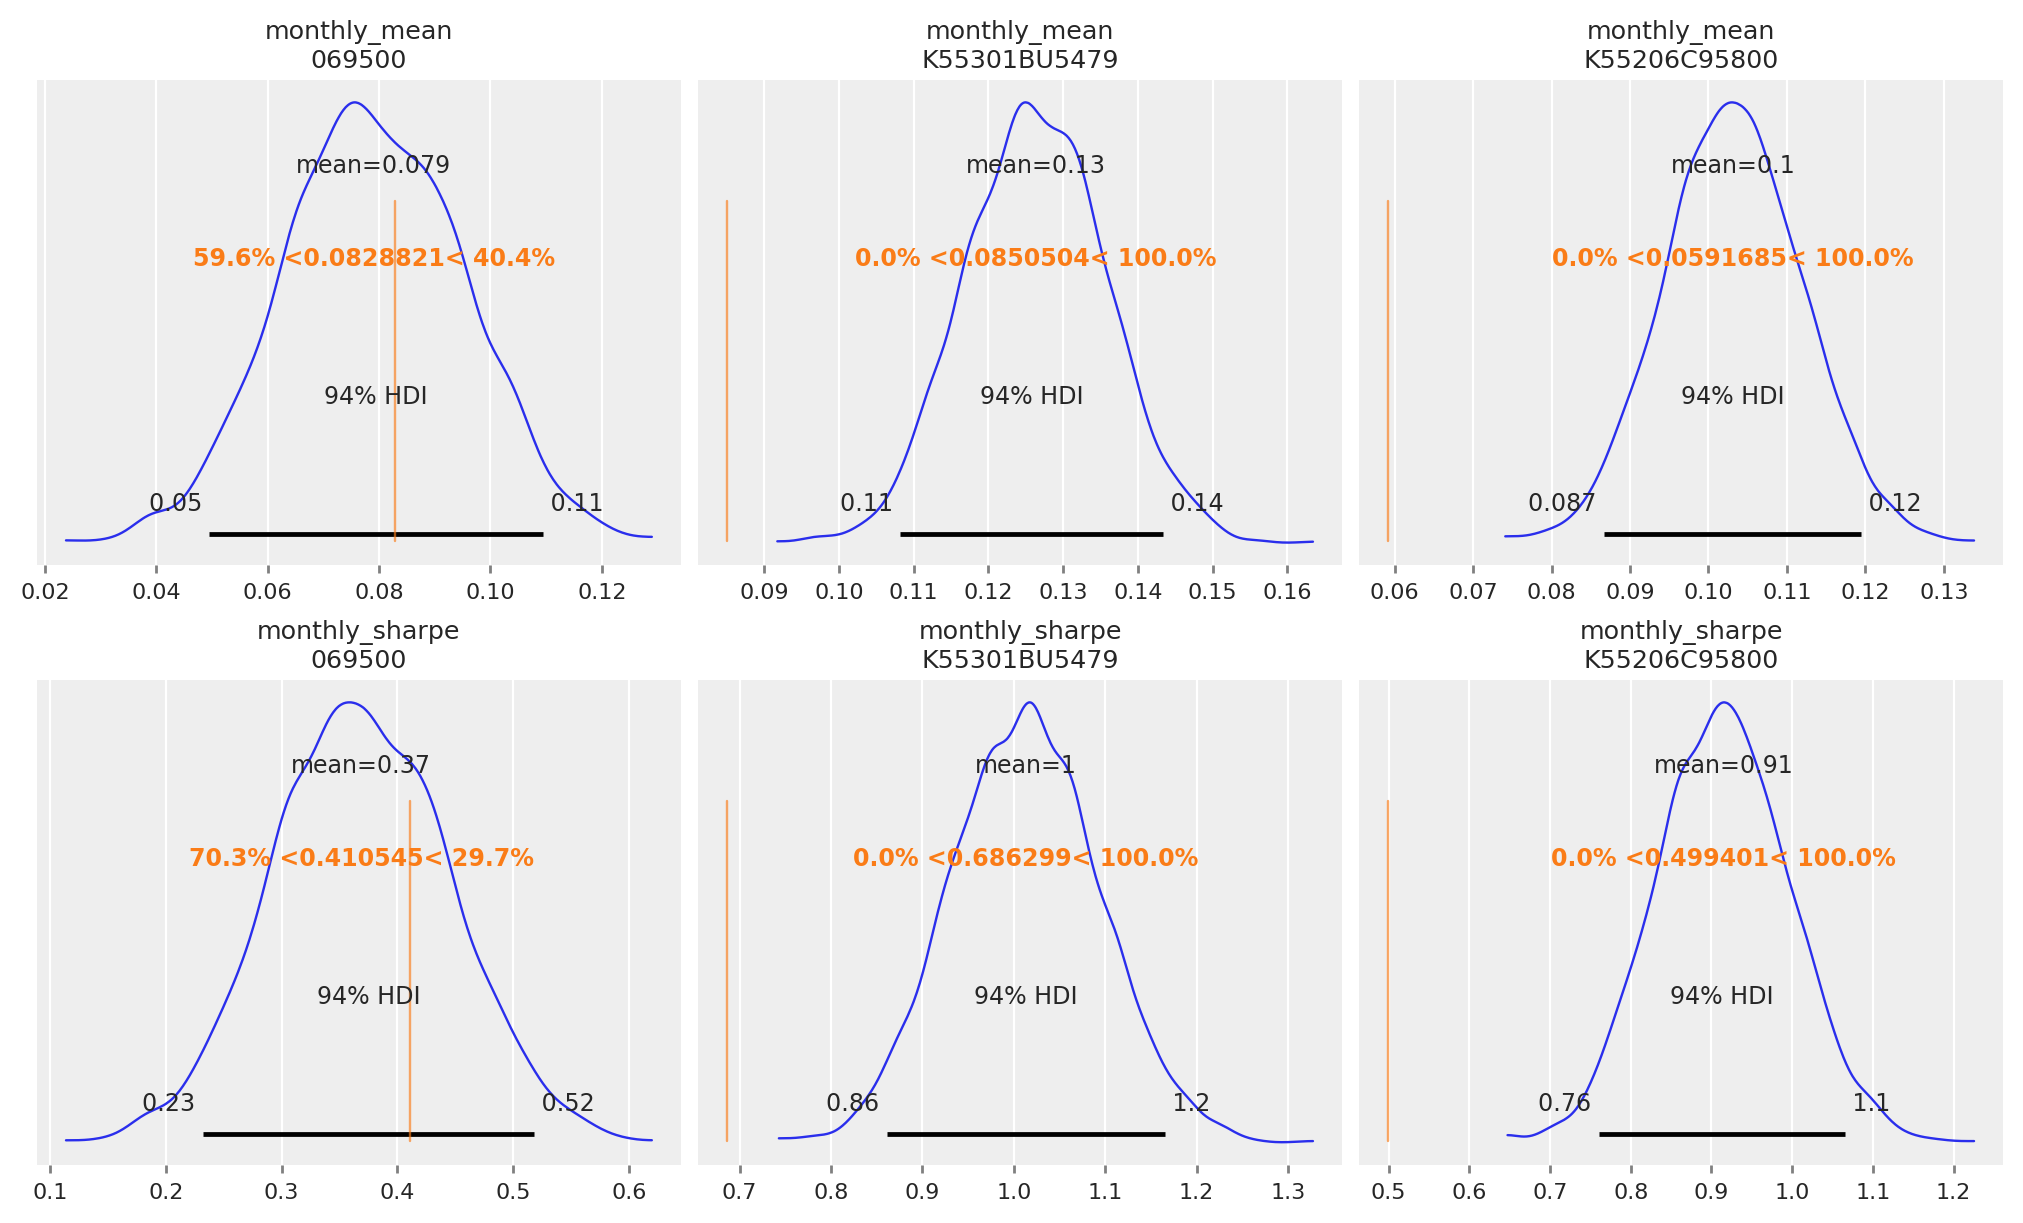

In [37]:
ae.bayesian_plot(var_names, figsize=(10,6), textsize=8)

In [38]:
get_date_range(df_etfs)

,start date,end date
069500,2002-10-14,2024-06-11
148070,2011-10-20,2024-06-11
261220,2016-12-27,2024-06-11
273130,2017-06-29,2024-06-11
284430,2017-11-30,2024-06-11
305080,2018-08-30,2024-06-11
304660,2018-09-12,2024-06-11
379800,2021-04-09,2024-06-11
411060,2021-12-15,2024-06-11
453850,2023-03-14,2024-06-11


In [39]:
df = df_etfs.iloc[:, -4:]
ae = AssetEvaluator(df)
ae.summary(freq='monthly')

,305080,304660,148070,261220
years,5.6,5.6,12.4,7.3
cagr,0.008352,-0.011321,0.015793,-0.013299
monthly_mean,0.033926,-0.027318,0.008818,0.02819
monthly_vol,0.088685,0.157598,0.065396,0.466802
monthly_sharpe,0.382549,-0.173343,0.134847,0.060391


In [40]:
ae.bayesian_sample(freq='monthly')

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:09

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


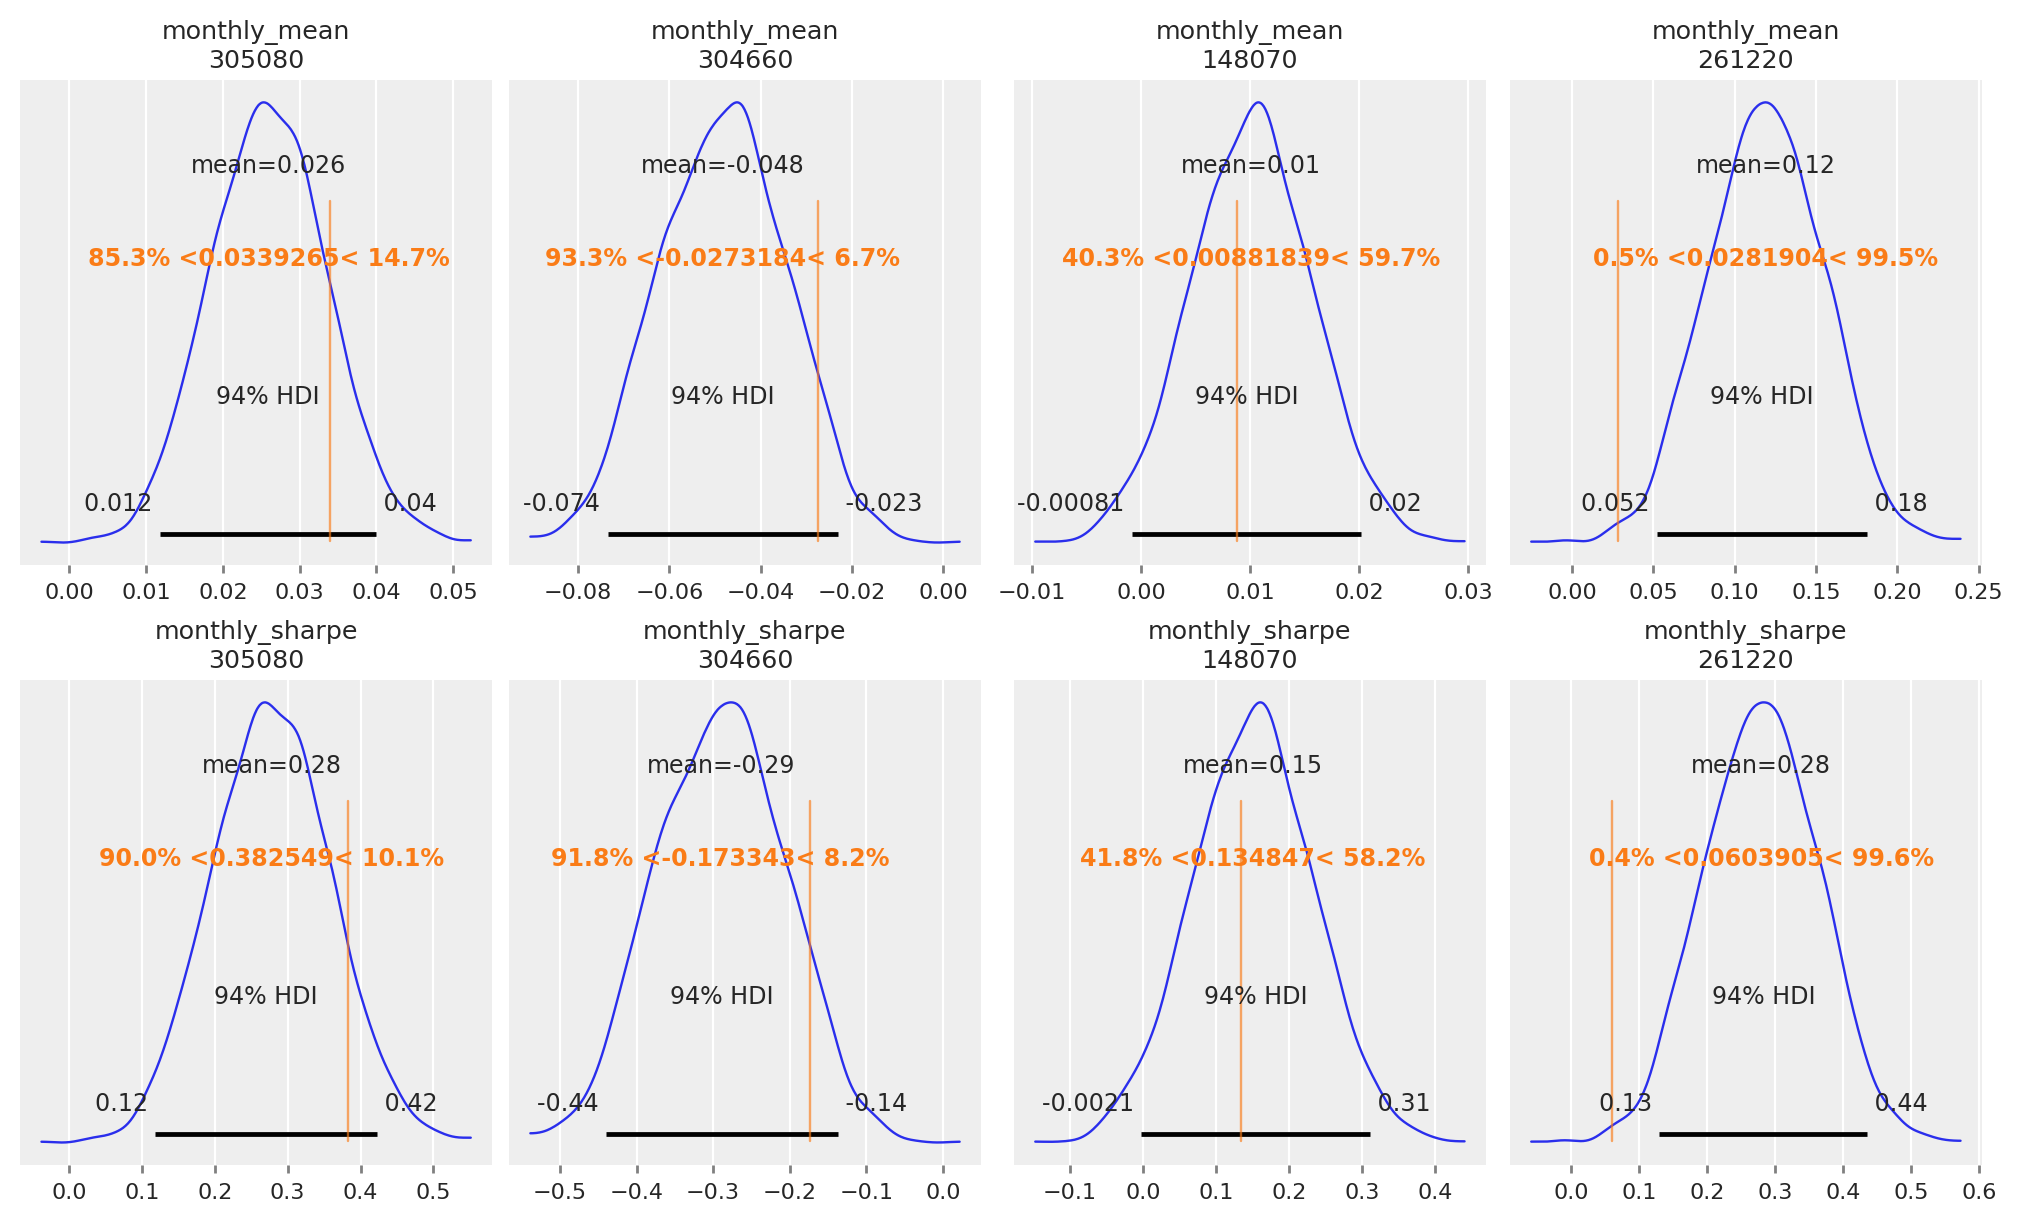

In [41]:
var_names = ['monthly_mean', 'monthly_sharpe']
ae.bayesian_plot(var_names, figsize=(10,6), textsize=8)